# Using BLS CPI monthly increase data

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
%matplotlib inline

In [16]:
vix_df = pd.read_csv('../data/vix-volatility-index-historical-chart.csv', header = None, names = ['Date', '$VIX'], skiprows = 16, parse_dates = True)
vix_df['Date'] = pd.to_datetime(vix_df['Date'])
vix_df = vix_df.dropna()

In [17]:
cpi_df = pd.read_excel("../data/cpi/BLS_CPI.xlsx", skiprows = 11)
cpi_df.columns = cpi_df.columns.str.replace(' ', '')
cpi_df = cpi_df.drop(['SeriesID'], axis = 1)
cpi_df['Date'] = pd.to_datetime(cpi_df['Year'].astype(str).str[:] + "-" + cpi_df['Period'].str[1:])

In [18]:
cpi_df

,Year,Period,Value,Unnamed:4,Unnamed:5,Date
0,1913,M01,9.800,NaN,NaN,1913-01-01
1,1913,M02,9.800,NaN,NaN,1913-02-01
2,1913,M03,9.800,NaN,NaN,1913-03-01
3,1913,M04,9.800,NaN,NaN,1913-04-01
4,1913,M05,9.700,NaN,NaN,1913-05-01
...,...,...,...,...,...,...
1389,2022,M06,296.311,NaN,NaN,2022-06-01
1390,2022,M07,296.276,NaN,NaN,2022-07-01
1391,2022,M08,296.171,NaN,NaN,2022-08-01
1392,2022,M09,296.808,NaN,NaN,2022-09-01


In [19]:
cpi_df.head()

,Year,Period,Value,Unnamed:4,Unnamed:5,Date
0,1913,M01,9.8,NaN,NaN,1913-01-01
1,1913,M02,9.8,NaN,NaN,1913-02-01
2,1913,M03,9.8,NaN,NaN,1913-03-01
3,1913,M04,9.8,NaN,NaN,1913-04-01
4,1913,M05,9.7,NaN,NaN,1913-05-01


In [21]:
cpi_df = cpi_df.set_index("Date")

In [22]:
scatter = cpi_df['Value'].resample("M").mean().pct_change()[1:]

In [23]:
scatter

Date
1913-02-28    0.000000
1913-03-31    0.000000
1913-04-30    0.000000
1913-05-31   -0.010204
1913-06-30    0.010309
                ...   
2022-05-31    0.011024
2022-06-30    0.013736
2022-07-31   -0.000118
2022-08-31   -0.000354
2022-09-30    0.002151
Freq: M, Name: Value, Length: 1316, dtype: float64

/home/smit/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/smit/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5,1,'CPI Increase per month')

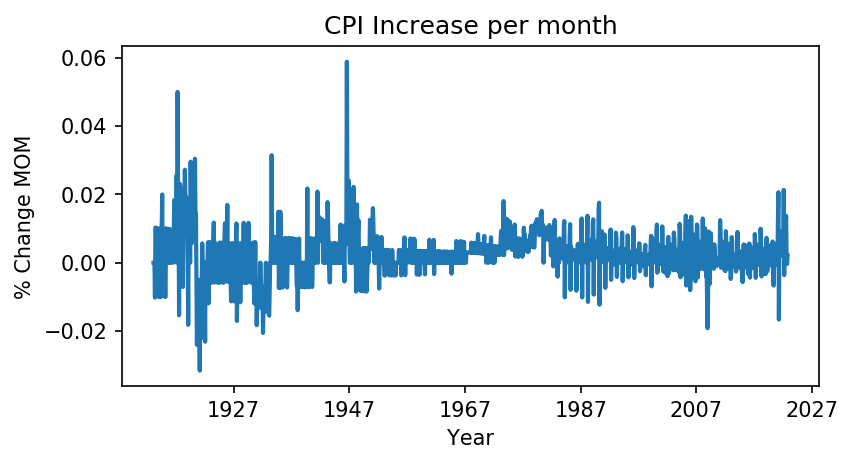

In [24]:
plt.figure(figsize = (6,3), dpi = 150)
plt.plot(scatter.index, scatter.values, lw = 2)
plt.xlabel("Year")
plt.ylabel("% Change MOM")
plt.title("CPI Increase per month")

In [25]:
scatter = pd.merge(vix_df, cpi_df, how = 'inner', on = 'Date')
scatter = scatter.set_index(["Date"])
scatter = scatter.resample("M").mean() 
scatter.index = pd.to_datetime(scatter.index, format="%Y%m")

m_inflation = scatter['Value'].pct_change()[1:]
m_spy = scatter['$VIX'].pct_change()[1:]
corr_coef = np.corrcoef(m_inflation, m_spy)[0,1]

In [26]:
scatter.head()

,$VIX,Year,Value,Unnamed:4,Unnamed:5
Date,,,,,
1990-02-28,24.87,1990.0,130.3,NaN,NaN
1990-03-31,21.90,1990.0,128.7,NaN,NaN
1990-04-30,NaN,NaN,NaN,NaN,NaN
1990-05-31,18.43,1990.0,129.2,NaN,NaN
1990-06-30,17.09,1990.0,129.9,NaN,NaN


In [27]:
scatter = scatter.reset_index()

(726557.0, 738428.0)

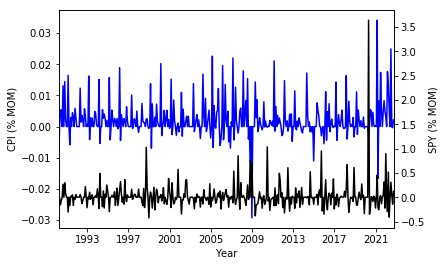

In [33]:
fig, ax1 = plt.subplots()
ax1.plot(m_inflation, color = "blue")
ax1.set_xlabel("Year")
ax1.set_ylabel("CPI (% MOM)")

ax2 = ax1.twinx()
ax2.plot(m_spy, color = "black")
ax2.set_ylabel("SPY (% MOM)")

ax1.set_xlim(min(m_inflation.index), max(m_inflation.index))

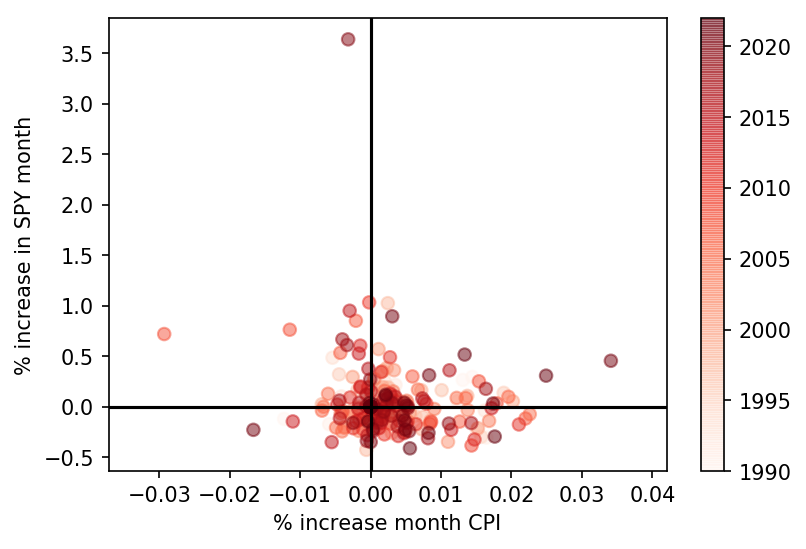

In [31]:
plt.figure(figsize = (6,4), dpi = 150)
plt.scatter(m_inflation, m_spy, c = m_inflation.index.year, cmap = "Reds", alpha = 0.5)
plt.axvline(color='black')
plt.axhline(color='black')
plt.xlabel("% increase month CPI")
plt.ylabel("% increase in SPY month")
plt.colorbar()

In [32]:
corr_coef

-0.10919945104572268

(726557.0, 738428.0)

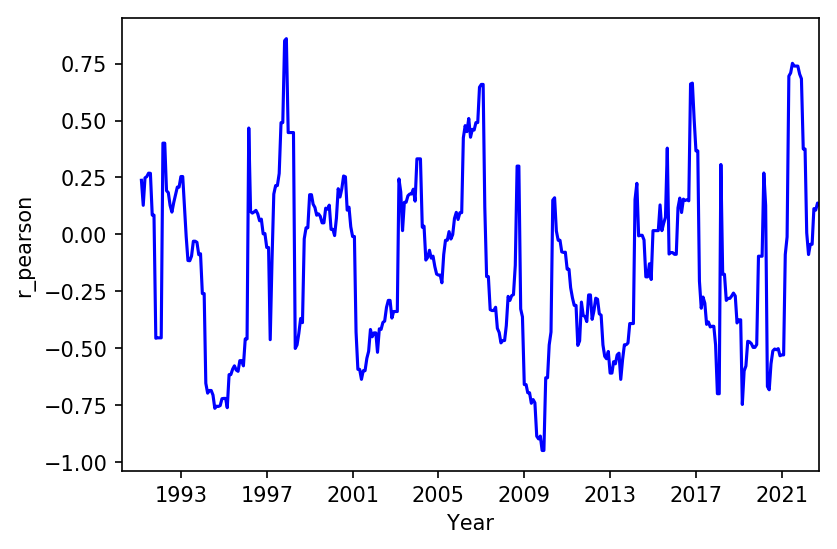

In [34]:
month_corr = 12

fig, ax1 = plt.subplots(figsize = (6,4), dpi = 150)
ax1.plot(m_inflation.rolling(month_corr).corr(m_spy), color = "blue")
ax1.set_xlabel("Year")
ax1.set_ylabel("r_pearson")

ax1.set_xlim(min(m_inflation.rolling(month_corr).corr(m_spy).index), max(m_inflation.rolling(month_corr).corr(m_spy).index))